In [1]:
install.packages("tidyverse")
library(tidyverse)

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\israe\AppData\Local\Temp\RtmpiiocEw\downloaded_packages


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
banco <- read_csv("Autism_Data.csv") # Carregando o Dataframe, Banco de Dados para o estudo

Parsed with column specification:
cols(
  .default = col_double(),
  age = col_character(),
  gender = col_character(),
  ethnicity = col_character(),
  jundice = col_character(),
  austim = col_character(),
  contry_of_res = col_character(),
  used_app_before = col_character(),
  age_desc = col_character(),
  relation = col_character(),
  `Class/ASD` = col_character()
)
See spec(...) for full column specifications.


In [3]:
names(banco) # O banco tem 21 variaveis

[1] "A1_Score"        "A2_Score"        "A3_Score"        "A4_Score"       
 [5] "A5_Score"        "A6_Score"        "A7_Score"        "A8_Score"       
 [9] "A9_Score"        "A10_Score"       "age"             "gender"         
[13] "ethnicity"       "jundice"         "austim"          "contry_of_res"  
[17] "used_app_before" "result"          "age_desc"        "relation"       
[21] "Class/ASD"

In [4]:
banco <- banco %>% select(-(11:20)) # Para a regressão vamos avaliar apenas o AQ10 em relação ao resultado do teste

In [5]:
names(banco) # Retiramos o restante das colunas
names(banco)[11] <- "Has_autism" # Renomeamos a coluna com o resultado do teste
names(banco) # Nome final das colunas

[1] "A1_Score"  "A2_Score"  "A3_Score"  "A4_Score"  "A5_Score"  "A6_Score" 
 [7] "A7_Score"  "A8_Score"  "A9_Score"  "A10_Score" "Class/ASD"

[1] "A1_Score"   "A2_Score"   "A3_Score"   "A4_Score"   "A5_Score"  
 [6] "A6_Score"   "A7_Score"   "A8_Score"   "A9_Score"   "A10_Score" 
[11] "Has_autism"

In [6]:
sapply(banco,class) # Para correlacionar precisamos que todas as variaveis sejam numericas

A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
   A7_Score    A8_Score    A9_Score   A10_Score  Has_autism 
  "numeric"   "numeric"   "numeric"   "numeric" "character"

In [7]:
# Vamos transformando os resultados em 1 para YES e em 0 para NO
banco <- mutate(banco,Has_autism = ifelse(Has_autism == 'YES', 1 , 0))

In [8]:
head(banco) # banco normalizado

A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Has_autism
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,0,1,1,0,0,0
1,1,0,1,0,0,0,1,0,1,0
1,1,0,1,1,0,1,1,1,1,1
1,1,0,1,0,0,1,1,0,1,0
1,0,0,0,0,0,0,1,0,0,0
1,1,1,1,1,0,1,1,1,1,1


In [8]:
sapply(banco,class) # Para correlacionar precisamos que todas as variaveis sejam numericas

A1_Score   A2_Score   A3_Score   A4_Score   A5_Score   A6_Score   A7_Score 
 "numeric"  "numeric"  "numeric"  "numeric"  "numeric"  "numeric"  "numeric" 
  A8_Score   A9_Score  A10_Score Has_autism 
 "numeric"  "numeric"  "numeric"  "numeric"

In [9]:
cor(banco) # Calculando a correlação de uma variavel com todas as outras

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Has_autism
A1_Score,1.00000000,0.01153892,0.07409593,0.127814230,0.1693691,0.1101993,0.21753794,0.147639774,0.1454524,0.11841298,0.2976276
A2_Score,0.01153892,1.00000000,0.22392092,0.158997916,0.1538208,0.1858637,-0.04176797,0.035407855,0.2054210,0.06888252,0.3113817
A3_Score,0.07409593,0.22392092,1.00000000,0.412722059,0.2649274,0.2688462,0.07821574,0.017770943,0.3151130,0.16845393,0.4410737
A4_Score,0.12781423,0.15899792,0.41272206,1.000000000,0.3068064,0.2951523,0.15123645,0.008616695,0.3276726,0.21096769,0.4699452
A5_Score,0.16936910,0.15382084,0.26492742,0.306806350,1.0000000,0.3923545,0.23858945,0.102086359,0.3965817,0.26756094,0.5370043
A6_Score,0.11019932,0.18586369,0.26884619,0.295152296,0.3923545,1.0000000,0.17548921,0.100123128,0.4794218,0.29443495,0.5920910
A7_Score,0.21753794,-0.04176797,0.07821574,0.151236453,0.2385894,0.1754892,1.00000000,0.085403244,0.1894796,0.25210651,0.3514286
A8_Score,0.14763977,0.03540785,0.01777094,0.008616695,0.1020864,0.1001231,0.08540324,1.000000000,0.1017328,0.10078183,0.2371606
A9_Score,0.14545244,0.20542100,0.31511299,0.327672571,0.3965817,0.4794218,0.18947962,0.101732780,1.0000000,0.28333987,0.6355758
A10_Score,0.11841298,0.06888252,0.16845393,0.210967690,0.2675609,0.2944349,0.25210651,0.100781830,0.2833399,1.00000000,0.3859171


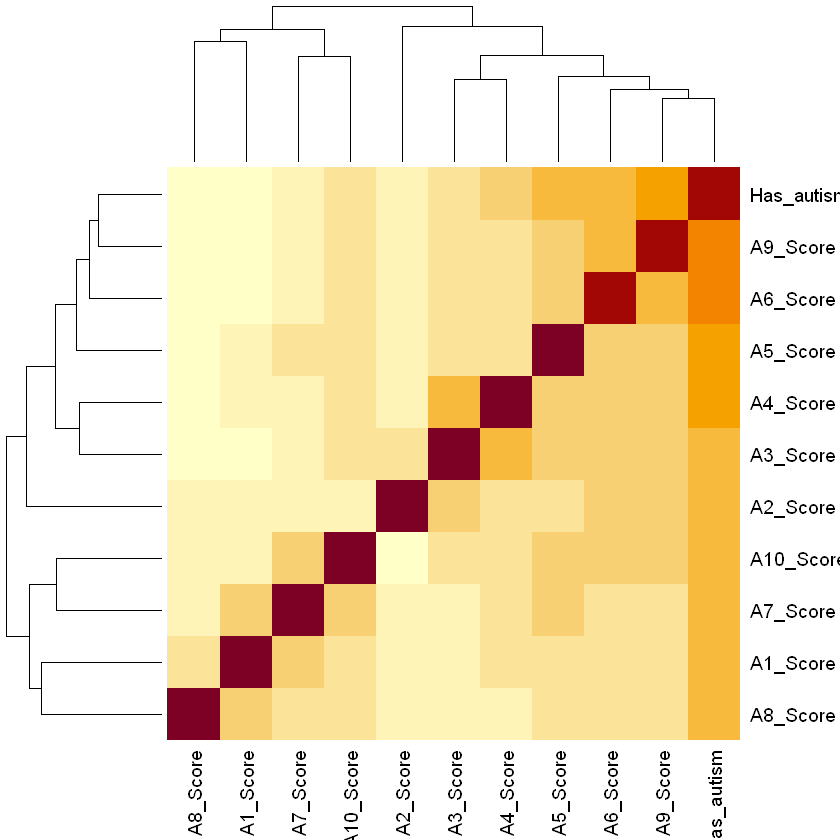

In [10]:
heatmap(abs(cor(banco))) # O grafico demonstra o grau de relacionamento entre as variaveis

In [11]:
# Has_autism tem forte relação com A9_Score
# Lista de modelos
reg_simples <- lm(Has_autism ~ A9_Score, data = banco)
reg_multipla_2v <- lm(Has_autism ~ A9_Score + A6_Score, data = banco)
reg_multipla_3v <- lm(Has_autism ~ A9_Score + A6_Score + A5_Score, data = banco)
reg_multipla_4v <- lm(Has_autism ~ A9_Score + A6_Score + A5_Score + A4_Score, data = banco)
reg_multipla_5v <- lm(Has_autism ~ A9_Score + A6_Score + A5_Score + A4_Score + A3_Score, data = banco)

In [12]:
summary(reg_simples)
summary(reg_multipla_2v)
summary(reg_multipla_3v)
summary(reg_multipla_4v)
summary(reg_multipla_5v)

# Multiple R-squared
# reg_simples     - 0.404
# reg_multipla_2v - 0.5112
# reg_multipla_3v - 0.5668
# reg_multipla_4v - 0.6022
# reg_multipla_5v - 0.6185

# Aparentemente o melhoramento mais significativo para o modelo de regressão
# foi adicionar as variaveis:
# A9_Score
# A6_Score
# A5_Score
# A4_Score
# adicionar a variavel A3_Score não melhorou tão significamente o modelo, sendo assim
# o modelo reg_multipla_4v influencia 60% do teste AQ10
# podemos propor um novo teste mas ponderando o valor das repostas, um AQ10 ponderado

# Ou então escrever que o modelo reg_multipla_2v com 2/10 variaveis explica 50% do resultado.


Call:
lm(formula = Has_autism ~ A9_Score, data = banco)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67544 -0.07353 -0.07353  0.32456  0.92647 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.07353    0.01570   4.682 3.41e-06 ***
A9_Score     0.60191    0.02760  21.812  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3426 on 702 degrees of freedom
Multiple R-squared:  0.404,	Adjusted R-squared:  0.4031 
F-statistic: 475.8 on 1 and 702 DF,  p-value: < 2.2e-16



Call:
lm(formula = Has_autism ~ A9_Score + A6_Score, data = banco)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82340 -0.02423 -0.02423  0.17660  0.97577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02423    0.01478    1.64    0.102    
A9_Score     0.43249    0.02850   15.18   <2e-16 ***
A6_Score     0.36668    0.02957   12.40   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3105 on 701 degrees of freedom
Multiple R-squared:  0.5112,	Adjusted R-squared:  0.5098 
F-statistic: 366.6 on 2 and 701 DF,  p-value: < 2.2e-16



Call:
lm(formula = Has_autism ~ A9_Score + A6_Score + A5_Score, data = banco)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84631 -0.18361  0.05154  0.15369  0.81639 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.05154    0.01605  -3.210  0.00139 ** 
A9_Score     0.36448    0.02779  13.116  < 2e-16 ***
A6_Score     0.29823    0.02878  10.363  < 2e-16 ***
A5_Score     0.23514    0.02481   9.476  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2925 on 700 degrees of freedom
Multiple R-squared:  0.5668,	Adjusted R-squared:  0.5649 
F-statistic: 305.3 on 3 and 700 DF,  p-value: < 2.2e-16



Call:
lm(formula = Has_autism ~ A9_Score + A6_Score + A5_Score + A4_Score, 
    data = banco)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87721 -0.09702  0.10576  0.12279  0.90298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.10576    0.01686  -6.274 6.18e-10 ***
A9_Score     0.32689    0.02707  12.076  < 2e-16 ***
A6_Score     0.27152    0.02780   9.766  < 2e-16 ***
A5_Score     0.20277    0.02414   8.398 2.52e-16 ***
A4_Score     0.18179    0.02303   7.893 1.14e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2805 on 699 degrees of freedom
Multiple R-squared:  0.6022,	Adjusted R-squared:  0.5999 
F-statistic: 264.6 on 4 and 699 DF,  p-value: < 2.2e-16



Call:
lm(formula = Has_autism ~ A9_Score + A6_Score + A5_Score + A4_Score + 
    A3_Score, data = banco)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90033 -0.13957  0.00143  0.12973  0.80905 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.12973    0.01710  -7.589 1.04e-13 ***
A9_Score     0.30740    0.02677  11.484  < 2e-16 ***
A6_Score     0.26098    0.02732   9.554  < 2e-16 ***
A5_Score     0.19238    0.02374   8.104 2.38e-15 ***
A4_Score     0.14100    0.02378   5.930 4.77e-09 ***
A3_Score     0.12830    0.02352   5.455 6.81e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2749 on 698 degrees of freedom
Multiple R-squared:  0.6185,	Adjusted R-squared:  0.6158 
F-statistic: 226.3 on 5 and 698 DF,  p-value: < 2.2e-16


In [14]:
# Numero de diganosticos positivos e negativos respectivamente.
count(banco %>% filter(Has_autism==1))
count(banco %>% filter(Has_autism==0))

n
<int>
515


n
<int>
189
